In [1]:
from tensorflow import keras

2021-12-19 00:34:03.479119: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 00:34:03.479158: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Build a model

Once you've defined an input layer and an output layer, you can build a Keras model. The model object is how you tell Keras where the model starts and stops: where data comes in and where predictions come out.

* Instructions

    * Import Model from keras.models to create a keras model.
    * Use the input layer and output layer you already defined as the model's input and output.


In [2]:
# Input/dense/output layers
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# Build the model
from keras.models import Model
model = Model(input_tensor, output_tensor)

2021-12-19 00:34:04.950306: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-19 00:34:04.950344: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 00:34:04.950374: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Rabie): /proc/driver/nvidia/version does not exist
2021-12-19 00:34:04.950603: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

### Visualize a model

Now that you've compiled the model, take a look a the result of your hard work! You can do this by looking at the model summary, as well as its plot.

The summary will tell you the names of the layers, as well as how many units they have and how many parameters are in the model.

The plot will show how the layers connect to each other.

* Instructions

    * Summarize the model.
    * Plot the model.


In [4]:
import os
same_path = os.path.abspath(os.getcwd())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


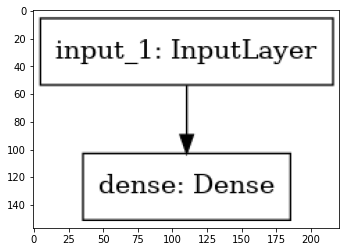

In [6]:
# Import the plotting function
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file=same_path+'/model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

### Fit the model to the tournament basketball data

Now that the model is compiled, you are ready to fit it to some data!

In this exercise, you'll use a dataset of scores from US College Basketball tournament games. Each row of the dataset has the team ids: team_1 and team_2, as integers. It also has the seed difference between the teams (seeds are assigned by the tournament committee and represent a ranking of how strong the teams are) and the score difference of the game (e.g. if team_1 wins by 5 points, the score difference is 5).

To fit the model, you provide a matrix of X variables (in this case one column: the seed difference) and a matrix of Y variables (in this case one column: the score difference).

The games_tourney DataFrame along with the compiled model object is available in your workspace.
* Instructions

    * Fit the model with seed_diff as the input variable and score_diff as the output variable.
    * Use 1 epoch, a batch size of 128, and a 10% validation split.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
games_tourney = pd.read_csv('../basketball_data/games_tourney.csv')
games_tourney.shape

(4234, 9)

In [11]:
games_tourney_train, games_tourney_test = train_test_split(games_tourney,\
                                                           train_size=0.8, \
                                                           random_state=123)

In [15]:
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=0.1,
          verbose=True)

24/24 [==============================] - 0s 3ms/step - loss: 11.8401 - val_loss: 11.7667


### Evaluate the model on a test set

After fitting the model, you can evaluate it on new data. You will give the model a new X matrix (also called test data), allow it to make predictions, and then compare to the known y variable (also called target data).

In this case, you'll use data from the post-season tournament to evaluate your model. The tournament games happen after the regular season games you used to train our model, and are therefore a good evaluation of how well your model performs out-of-sample.

The games_tourney_test DataFrame along with the fitted model object is available in your workspace.
* Instructions

    * Assign the test data (seed_diff column) to X_test.
    * Assign the target data (score_diff column) to y_test.
    * Evaluate the model on X_test and y_test.



In [17]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test,y_test, verbose=True))

27/27 [==============================] - 0s 1ms/step - loss: 12.5581
12.558080673217773
